# Import modules

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter

# Load dataset (IRIS) and split into Train set and Test set

In [28]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


# Visualize Dataset

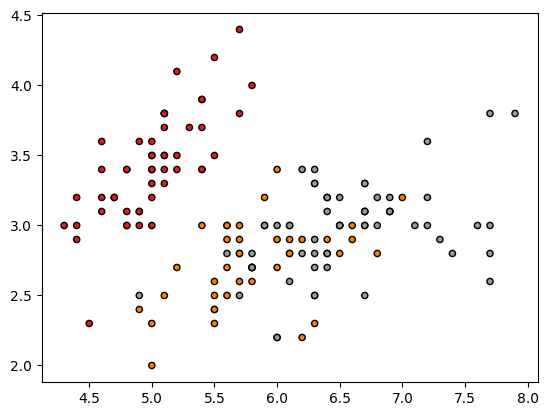

In [12]:
plt.figure()
cmap = plt.cm.Set1
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap, edgecolor = 'k', s = 20)
plt.show()

# Implement KNN

In [25]:
class KNN:
  def __init__(self, k):
    self.k = k

  def euclide_distance(self, x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predicted_labels = [self._predict(x) for x in X]
    return np.array(predicted_labels)

  def _predict(self, x):
    #compute distance
    distances = []
    for x_train in self.X_train:
      distance = self.euclide_distance(x, x_train)
      distances.append(distance)
    #get k nearest samples with labels
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels = []
    for i in k_indices:
      k_nearest_labels.append(self.y_train[i])
    #vote
    most_common = Counter(k_nearest_labels).most_common()
    return most_common[0][0]

#Inference

In [30]:
k = 3
cls = KNN(k)
cls.fit(X_train, y_train)
predictions = cls.predict(X_test)

In [34]:
acc = accuracy_score(y_test, predictions)
print(f'KNN Accuracy on Iris dataset with k = {k}: {acc * 100}%')

KNN Accuracy on Iris dataset with k = 3: 100.0%
